In [1]:
import pandas as pd
df = pd.read_csv("/content/goal15.forest_shares.csv")
df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [2]:
df.describe()

,forests_2000,forests_2020,trend
count,237.000000,237.000000,227.000000
mean,32.255274,31.585654,0.104846
std,25.366225,24.744673,16.863427
min,0.000000,0.000000,-100.000000
25%,9.900000,10.400000,-5.500000
50%,30.300000,30.300000,0.000000
75%,50.900000,49.800000,4.650000
max,98.300000,97.400000,86.200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         237 non-null    object 
 1   forests_2000  237 non-null    float64
 2   forests_2020  237 non-null    float64
 3   trend         227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


In [4]:
df.isnull().sum()

iso3c            0
forests_2000     0
forests_2020     0
trend           10
dtype: int64

In [63]:
import pandas as pd
data = ("/content/goal15.forest_shares.csv")
df = pd.read_csv(data)
df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [65]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])

# Convert non-numeric columns to numeric types
#df['iso3c'] = pd.to_numeric(df['iso3c'])
X = StandardScaler().fit_transform(df)
X

array([[-1.19921346e+00, -1.20221756e+00, -6.23108944e-03],
       [-1.64157991e-01, -1.12814161e-01,  1.42346358e-01],
       [-1.24662058e+00, -1.24676565e+00,  8.43631911e-01],
       [ 2.22990161e+00,  2.19153726e+00, -2.08296418e-01],
       [ 6.89270198e-02,  9.77768300e-02, -6.23108944e-03],
       [ 1.18694495e+00,  8.83443221e-01, -8.56094090e-01],
       [ 1.13953783e+00,  1.19527988e+00, -6.23108944e-03],
       [-4.24897155e-01, -5.29946318e-01, -8.38264796e-01],
       [-7.92302341e-01, -8.57982285e-01, -8.85809580e-01],
       [-8.12055308e-01, -8.13434191e-01, -1.07263754e-01],
       [-1.18341109e+00, -1.18601825e+00, -6.23108944e-03],
       [-5.94772671e-01, -5.74494412e-01,  6.50860854e-02],
       [ 5.62751194e-01,  6.36403789e-01,  9.48015750e-02],
       [-8.00203527e-01, -7.24338002e-01,  8.37688813e-01],
       [ 7.36577304e-01,  7.82197552e-01, -6.23108944e-03],
       [-1.25452177e+00, -1.24271583e+00,  4.74824724e+00],
       [-6.89586912e-01, -6.91939388e-01

In [59]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df = imputer.fit_transform(df)

pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(df)
X_pca

array([[-1.19514763e+00,  2.01092360e-01],
       [-1.43643620e-01, -1.27657505e-01],
       [-1.27136752e+00, -6.57007351e-01],
       [ 2.20890951e+00, -1.42084065e-01],
       [ 8.28265458e-02, -1.00532162e-02],
       [ 1.06524879e+00,  7.34457981e-01],
       [ 1.16173933e+00, -1.88310073e-01],
       [-4.43935654e-01,  9.41320475e-01],
       [-7.88937299e-01,  1.04208113e+00],
       [-8.05297618e-01,  2.40963061e-01],
       [-1.17922272e+00,  1.98461262e-01],
       [-5.84646217e-01,  2.63740703e-02],
       [ 5.92566079e-01, -2.01016809e-01],
       [-7.89874227e-01, -7.37042980e-01],
       [ 7.55654072e-01, -1.21217086e-01],
       [-1.41314778e+00, -4.63324322e+00],
       [-6.83204244e-01,  2.39459191e-01],
       [-6.85550452e-01,  1.16897239e-01],
       [ 3.88107025e-01, -4.29413311e-01],
       [-3.86874967e-01, -1.54826454e-01],
       [ 1.14676568e+00,  6.07748397e-01],
       [ 6.73186123e-02,  1.50792384e+00],
       [-5.34263789e-01,  9.19018128e-02],
       [ 1.

In [67]:
print("original number of feature ", X.shape[1])
print("reduced number of feature ", X_pca.shape[1])

original number of feature  3
reduced number of feature  2


In [74]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 412


In [83]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any (upper [column] > 0.95)]
df.drop(df[to_drop], axis=1)

,forests_2000,trend
0,1.9,0.0
1,28.1,2.5
2,0.7,14.3
3,88.7,-3.4
4,34.0,0.0
...,...,...
232,2.5,0.0
233,31.9,-2.2
234,1.0,0.0
235,63.3,-4.7


In [84]:
df.corr()


,forests_2000,forests_2020,trend
forests_2000,1.000000,0.988951,-0.175084
forests_2020,0.988951,1.000000,-0.085852
trend,-0.175084,-0.085852,1.000000


In [85]:
upper


,forests_2000,forests_2020,trend
forests_2000,NaN,0.988951,0.175084
forests_2020,NaN,NaN,0.085852
trend,NaN,NaN,NaN


In [86]:
df.drop(df[to_drop], axis =1)

,forests_2000,trend
0,1.9,0.0
1,28.1,2.5
2,0.7,14.3
3,88.7,-3.4
4,34.0,0.0
...,...,...
232,2.5,0.0
233,31.9,-2.2
234,1.0,0.0
235,63.3,-4.7


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/goal15.forest_shares.csv", encoding="latin-1")
print(data.head())

  iso3c  forests_2000  forests_2020  trend
0   AFG           1.9           1.9    0.0
1   ALB          28.1          28.8    2.5
2   DZA           0.7           0.8   14.3
3   ASM          88.7          85.7   -3.4
4   AND          34.0          34.0    0.0


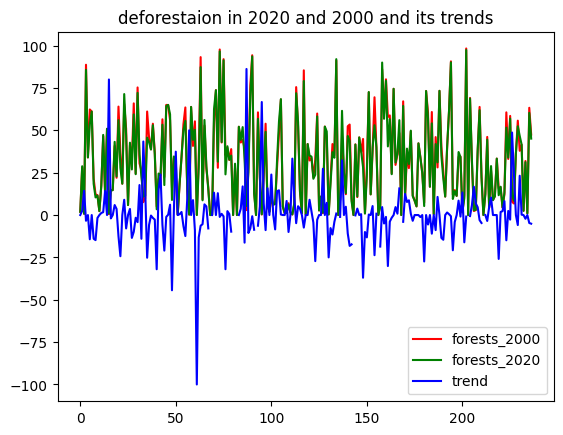

In [92]:
plt.plot(data["forests_2000"], "-r", label="forests_2000")
plt.plot(data["forests_2020"], "-g", label="forests_2020")
plt.plot(data["trend"], "-b", label="trend")
plt.legend()
plt.title("deforestaion in 2020 and 2000 and its trends")

plt.show()

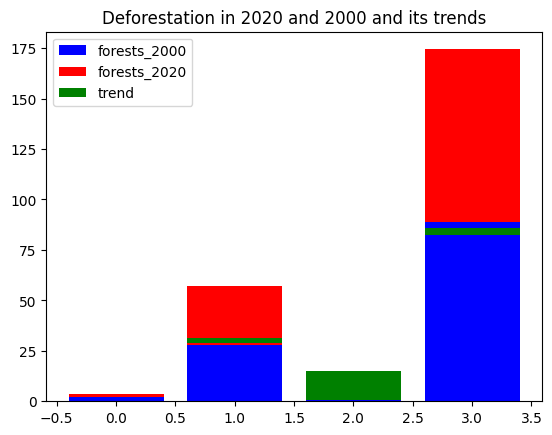

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("/content/goal15.forest_shares.csv", encoding="latin-1")

# Select the first four elements of the 'forests_2000' column
a = data['forests_2000'].iloc[:4]

# Select the first four elements of the 'forests_2020' column
b = data['forests_2020'].iloc[:4]

# Select the first four elements of the 'trend' column
c = data['trend'].iloc[:4]

# Create a range of values with the same length as 'a'
x = np.arange(len(a))

# Plot the data as a bar chart
plt.bar(x, a, color='b')
plt.bar(x, b, color='r', bottom=a)
plt.bar(x, c, color='g', bottom=b)
plt.title("Deforestation in 2020 and 2000 and its trends")
plt.legend(["forests_2000", "forests_2020", "trend"])
plt.show()


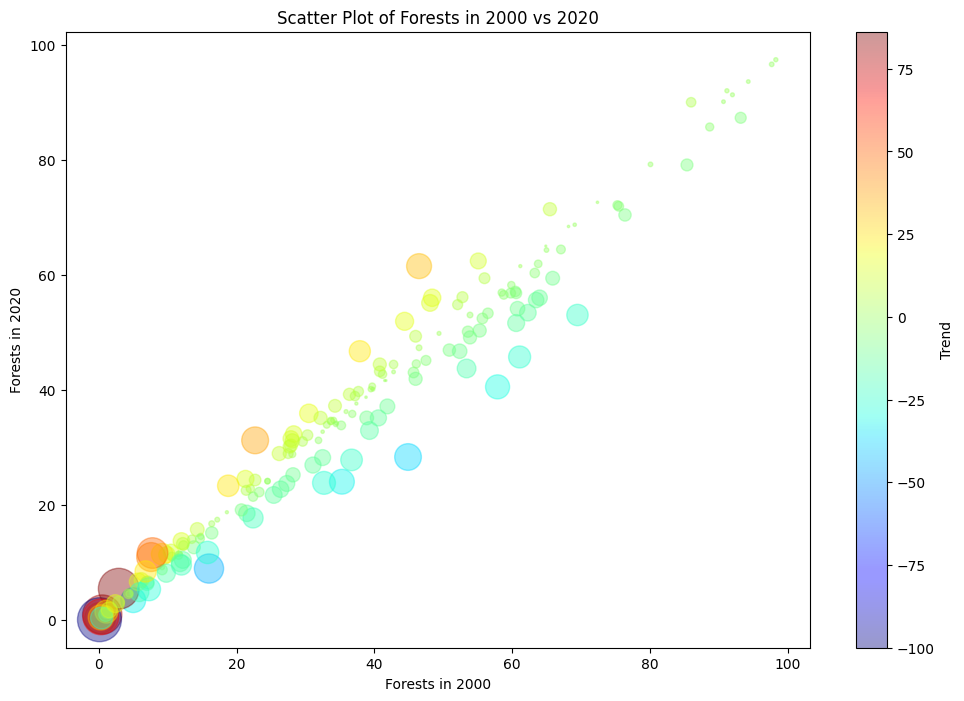

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/goal15.forest_shares.csv")

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=data['forests_2000'],
    y=data['forests_2020'],
    alpha=0.4,
    s=data['trend'].abs() * 10,  # Multiply by a factor to make the sizes more visible
    c=data['trend'],
    cmap='jet'
)
plt.colorbar(scatter, label='Trend')
plt.xlabel('Forests in 2000')
plt.ylabel('Forests in 2020')
plt.title('Scatter Plot of Forests in 2000 vs 2020')
plt.show()


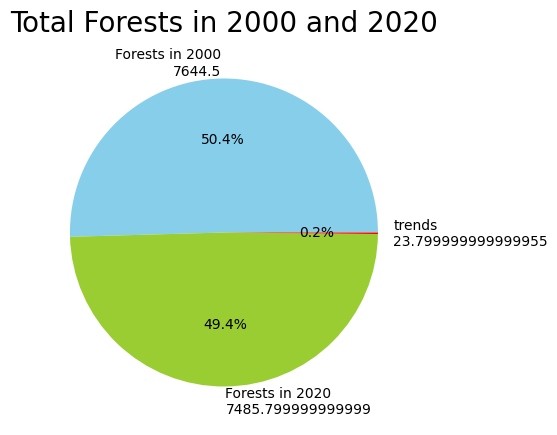

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/goal15.forest_shares.csv")

# Calculate the sum of forests in 2000 and 2020
total_forests_2000 = df['forests_2000'].sum()
total_forests_2020 = df['forests_2020'].sum()
total_trend = df['trend'].sum()

# Create a pie chart
group_size = [total_forests_2000, total_forests_2020, total_trend]
group_labels = ["Forests in 2000\n" + str(total_forests_2000),
                "Forests in 2020\n" + str(total_forests_2020),
                "trends\n"+str(total_trend)]
custom_colors = ["skyblue", "yellowgreen","red"]

plt.figure(figsize=(5, 5))
plt.pie(group_size, labels=group_labels, colors=custom_colors, autopct='%1.1f%%')
plt.title("Total Forests in 2000 and 2020", fontsize=20)
plt.show()


In [111]:
import plotly.express as px
fig = px.box(data, y="forests_2000")
fig.show()

In [112]:
import plotly.express as px
fig = px.box(data, y="forests_2020")
fig.show()

In [113]:
import plotly.express as px
fig = px.box(data, y="trend")
fig.show()

In [115]:
import plotly.express as px
figure = px.line(data, x = data.index, y = "forests_2000")
figure.show()

In [116]:
import plotly.express as px
figure = px.line(data, x = data.index, y = "forests_2020")
figure.show()

In [118]:
import plotly.express as px
figure = px.line(data, x = data.index, y = "trend")
figure.show()

In [129]:
import pandas as pd
import plotly.graph_objects as go

# Read the data
data = pd.read_csv("/content/goal15.forest_shares.csv")

# Create a bar chart
fig = go.Figure()

# Add bar traces
fig.add_trace(go.Bar(name='Forests in 2000', x=data['iso3c'], y=data['forests_2000'], marker_color='blue'))
fig.add_trace(go.Bar(name='Forests in 2020', x=data['iso3c'], y=data['forests_2020'], marker_color='green'))
fig.add_trace(go.Bar(name='Trend', x=data['iso3c'], y=data['trend'], marker_color='red'))

# Add line traces
fig.add_trace(go.Scatter(name='Forests in 2000', x=data['iso3c'], y=data['forests_2000'], mode='lines', line=dict(color='blue')))
fig.add_trace(go.Scatter(name='Forests in 2020', x=data['iso3c'], y=data['forests_2020'], mode='lines', line=dict(color='green')))
fig.add_trace(go.Scatter(name='Trend', x=data['iso3c'], y=data['trend'], mode='lines', line=dict(color='red')))

# Update layout
fig.update_layout(title='Deforestation Analysis (2000 and 2020) with trend', template='plotly_dark', barmode='group')

# Show the figure
fig.show()


In [128]:

import plotly.express as px
data = pd.read_csv("/content/goal15.forest_shares.csv")
figure = px.sunburst(data, path=["iso3c", "forests_2000"], values="trend")
figure.show()